In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penguin-size-dataset/penguins_size.csv


In [2]:
df=pd.read_csv('/kaggle/input/penguin-size-dataset/penguins_size.csv')

In [3]:
df.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
304,Gentoo,Biscoe,44.9,13.8,212.0,4750.0,FEMALE
120,Adelie,Torgersen,36.2,17.2,187.0,3150.0,FEMALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE


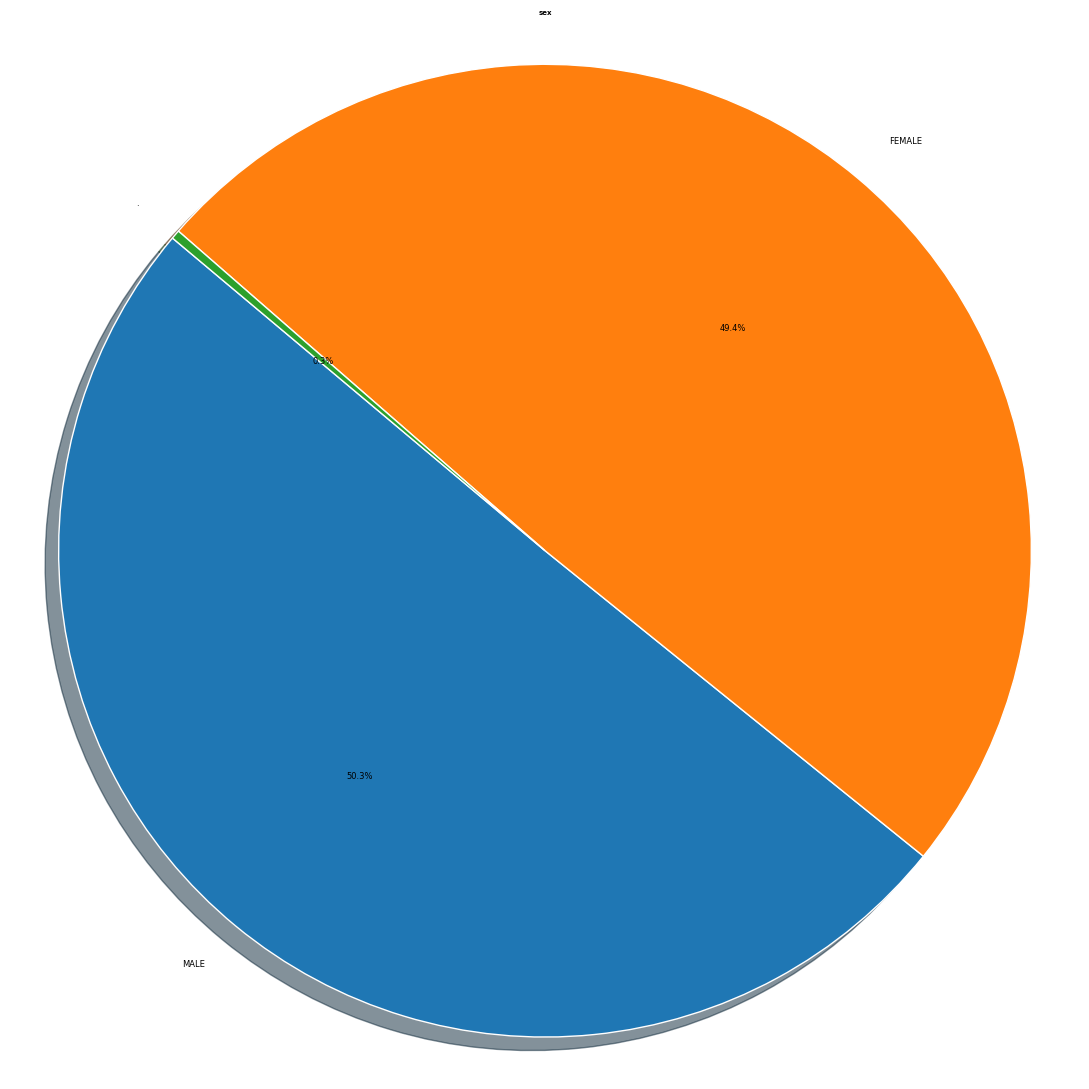

In [4]:
penguin = df['sex'].value_counts()





plt.figure(figsize=(11, 11))
plt.pie(
    penguin.values,
    labels=penguin.index,
    autopct='%1.1f%%',
    startangle=140,
 
    shadow=True,
    textprops={'fontsize': 6},
    wedgeprops={'edgecolor': 'white'}
)


plt.title('sex', fontsize=5, fontweight='bold')

plt.axis('equal') 
plt.tight_layout()
plt.show()

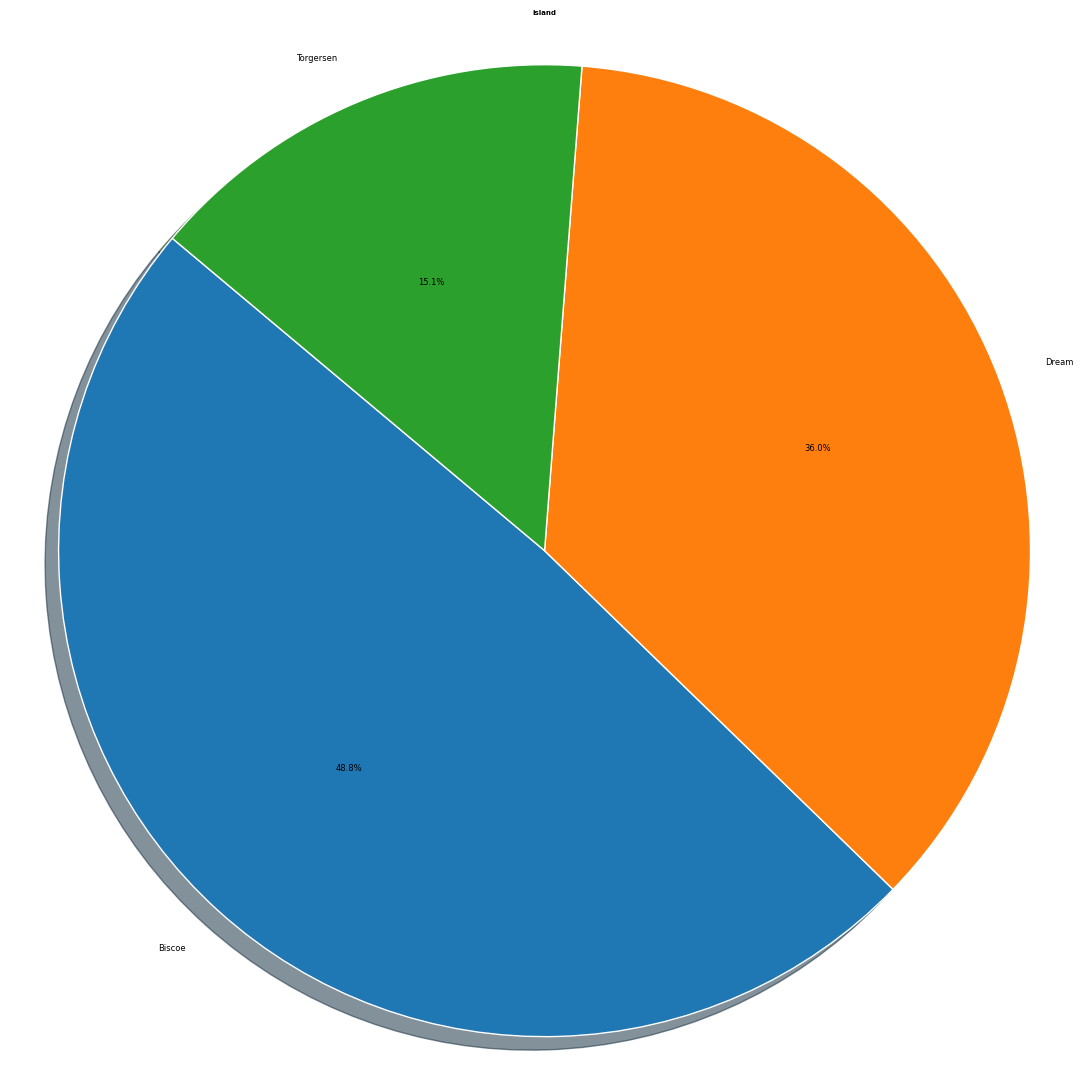

In [5]:
penguin = df['island'].value_counts()





plt.figure(figsize=(11, 11))
plt.pie(
    penguin.values,
    labels=penguin.index,
    autopct='%1.1f%%',
    startangle=140,
 
    shadow=True,
    textprops={'fontsize': 6},
    wedgeprops={'edgecolor': 'white'}
)


plt.title('island', fontsize=5, fontweight='bold')

plt.axis('equal') 
plt.tight_layout()
plt.show()

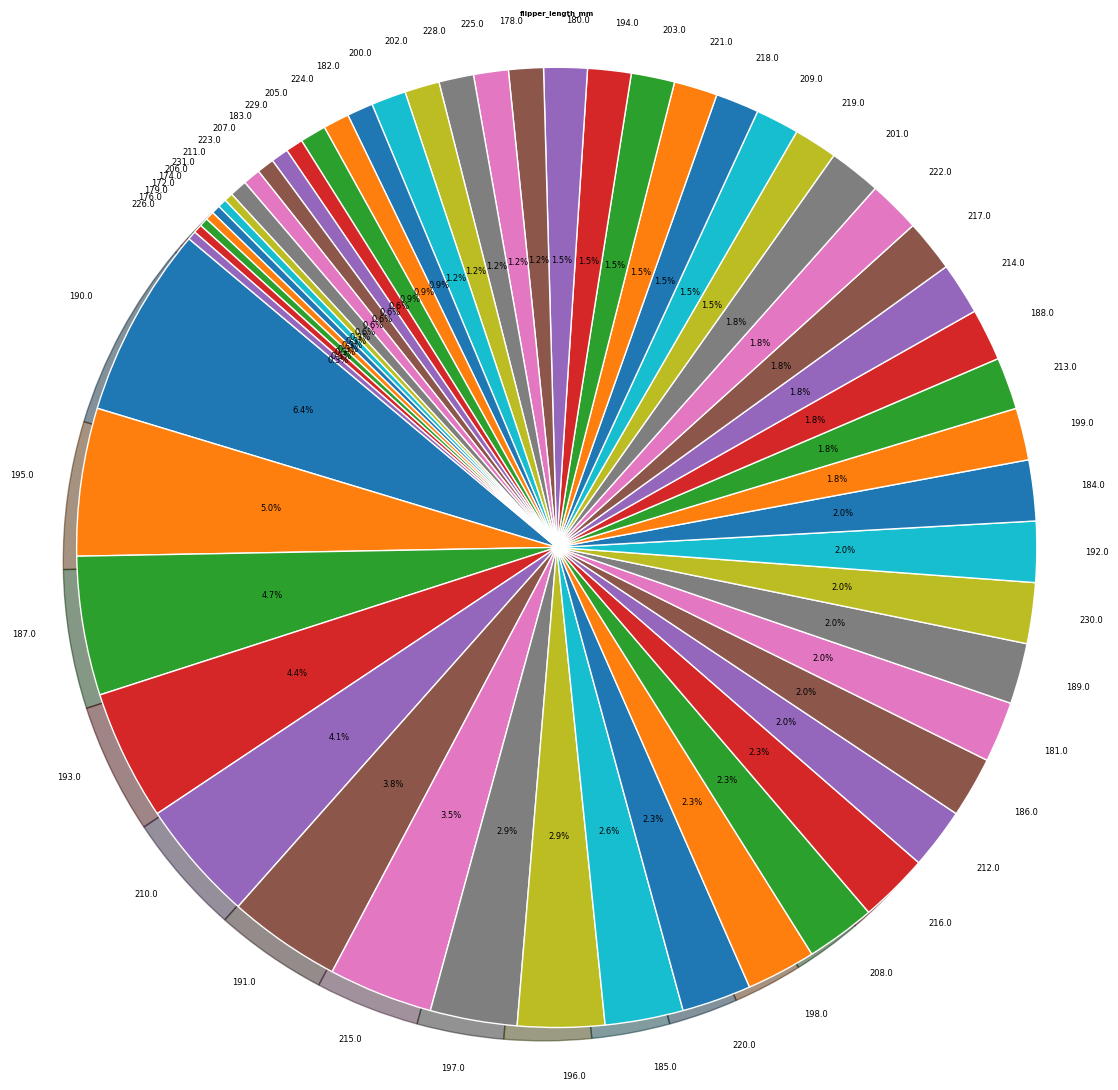

In [6]:
penguin = df['flipper_length_mm'].value_counts()





plt.figure(figsize=(11, 11))
plt.pie(
    penguin.values,
    labels=penguin.index,
    autopct='%1.1f%%',
    startangle=140,
 
    shadow=True,
    textprops={'fontsize': 6},
    wedgeprops={'edgecolor': 'white'}
)


plt.title('flipper_length_mm', fontsize=5, fontweight='bold')

plt.axis('equal') 
plt.tight_layout()
plt.show()

In [7]:
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:

label_encoders = {}
for column in ['island', 'sex']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

y = df['species']
x = df.drop(columns=['species'])


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, train_size=0.7)


model = HistGradientBoostingClassifier()
model.fit(x_train, y_train)


print("Test Accuracy:", model.score(x_test, y_test))

Test Accuracy: 0.9903846153846154
